# Exercise 1.4

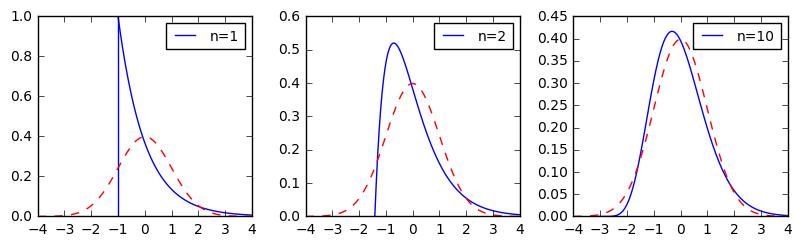

In [568]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

x1 = np.linspace(-4,4,100)

plt.subplot(131)
n=1 
x = np.linspace(-math.sqrt(n),4,100)
form = (n**(n-0.5))/(math.factorial(n-1)) * (1 + x/np.sqrt(n))**(n-1) * \
np.exp(-n*(1+x/math.sqrt(n)))

plt.plot(x,form,'b-',label='n=1',);
plt.plot((-math.sqrt(n),-math.sqrt(n)),(0,max(form)))
plt.plot(x1,mlab.normpdf(x1,0,math.sqrt(1)),'r--')
plt.legend(loc='best',prop={'size':10})

plt.subplot(132)
n=2
x = np.linspace(-math.sqrt(n),4,100)
form = (n**(n-0.5))/(math.factorial(n-1)) * (1 + x/np.sqrt(n))**(n-1) * \
np.exp(-n*(1+x/math.sqrt(n)))

plt.plot(x,form,'b-',label='n=2');
plt.plot(x1,mlab.normpdf(x1,0,math.sqrt(1)),'r--')
plt.legend(loc='best',prop={'size':10})

plt.subplot(133)
n = 10
x = np.linspace(-math.sqrt(n),4,100)
form = (n**(n-0.5))/(math.factorial(n-1)) * (1 + x/np.sqrt(n))**(n-1) * \
np.exp(-n*(1+x/math.sqrt(n)))

plt.plot(x,form,'b-',label='n=10');
plt.plot(x1,mlab.normpdf(x1,0,math.sqrt(1)),'r--')
plt.legend(loc='best',prop={'size':10})

plt.subplots_adjust(top=0.5, bottom=0, left=0.0, right=1.25,
                    hspace=0.4,wspace=0.25)
plt.show()


In [569]:
size = 500
tj_e = np.linspace(0,0,size)
i = 0
for i in range (0,size):
    tj_e[i] = -math.log(1 - ((i-0.5)/size))

In [570]:
x2 = np.linspace(65,135,100)

In [571]:
size = 500
import scipy.stats as ss
uniform = np.arange(0,1,1/size)

tj_norm = np.linspace(0,0,size)
i = 0
for i in range (1,size+1):
    tj_norm[i-1] = ss.norm.ppf((i-0.5)/size)

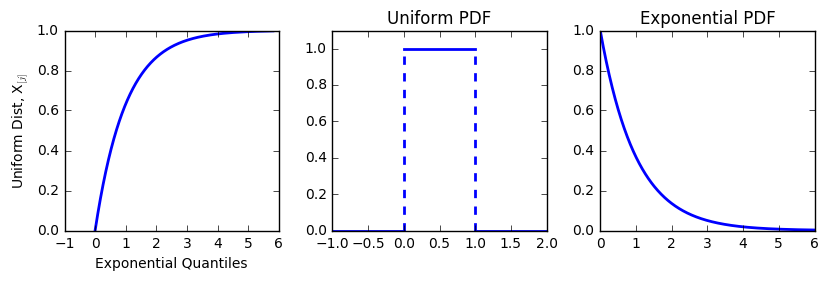

In [572]:
x1 = np.linspace(-4,4,100)
thick = 2
plt.subplot(131)
plt.plot(tj_e,uniform,'b-',linewidth=thick)
plt.xlabel('Exponential Quantiles')
plt.ylabel('Uniform Dist, X$_{[j]}$')

plt.subplot(132)
pdf_uni = np.linspace(1,1,500)
plt.plot(uniform,pdf_uni,'b-',linewidth=thick)
plt.plot((-1,0),(0,0),'b-',linewidth=thick)
plt.plot((1,2),(0,0),'b-',linewidth=thick)
plt.plot((0,0),(0,1),'b--',linewidth=thick)
plt.plot((1,1),(0,1),'b--',linewidth=thick)
plt.ylim([0,1.1])
plt.title('Uniform PDF')


plt.subplot(133)
x = np.linspace(0,6,500)
pdf_e = np.exp(-x)
plt.plot(x,pdf_e,'b-',linewidth=thick)
plt.title('Exponential PDF')

plt.subplots_adjust(top=0.5, bottom=0, left=0.0,
                    right=1.25, hspace=0.4,wspace=0.25)
plt.show()

# Exercise 2.2

The justification is that the plot is flat due to the distribution being one single tail with its heaviest point at the far left. This prevents the central limit theorem, even with a high enough sample size, from correcting towards a more normal distribution on the qq plot

# Excercise 2.3 

In [573]:
import pandas as pd
#thousdands to get rid of , in price column
df = pd.read_csv('data.txt', sep=" ", header = None, thousands = ",") 
df.columns = ["year", "price",'drop']
df = df.drop('drop',1)
df = df.drop('year',1)
#df.set_index("year",inplace = True)
#df.sort_index(ascending = True, inplace = True);

In [574]:
df.sort_values(by ='price',ascending=False,inplace = True)
df = df[0:270];
df = np.log(df); #log transform
df.sort_values(by ='price',ascending=True,inplace = True)

In [575]:
size = 270
tj_e = np.linspace(0,0,size)
i = 0
for i in range (1,size+1):
    tj_e[i-1] = -np.log(1 - ((i-0.5)/size))


tj_norm = np.linspace(0,0,size)
i = 0
for i in range (1,size+1):
    tj_norm[i-1] = ss.norm.ppf((i-0.5)/size)

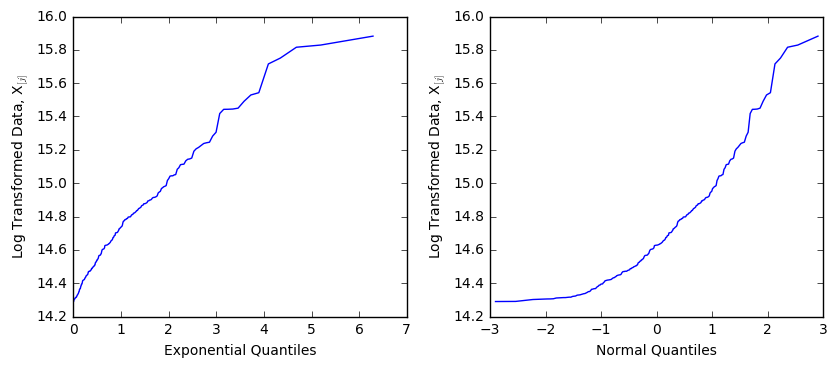

In [576]:
plt.subplot(121)
thick = 2
plt.plot(tj_e,df['price'])
plt.xlabel('Exponential Quantiles')
plt.ylabel('Log Transformed Data, X$_{[j]}$')

plt.subplot(122)
thick = 2
plt.plot(tj_norm,df['price'])
plt.xlabel('Normal Quantiles')
plt.ylabel('Log Transformed Data, X$_{[j]}$')

plt.subplots_adjust(top=0.75, bottom=0, left=0.0, 
                    right=1.25, hspace=0.4,wspace=0.25)
plt.show()

In [577]:
#reload the data
df1 = pd.read_csv('data.txt', sep=" ", header = None, thousands = ",")
df1.columns = ["year", "price",'drop']
df1 = df1.drop('drop',1)
df1 = df1.drop('year',1)
df1.sort_values(by ='price',ascending=True,inplace = True)

# Excercise 3.3

In [578]:
def estimator1(R):
    df_temp = df1[df1['price'] > R]
    df_temp = df_temp - R
    estimate=df_temp.sum()[0]/len(df1)
    return estimate

R = [3000000,3500000,4000000,5000000,7500000]

for i in R:
    print("Net Premium Estimate for R =",i,': ',estimator1(i))

Net Premium Estimate for R = 3000000 :  161728.105121
Net Premium Estimate for R = 3500000 :  108837.234501
Net Premium Estimate for R = 4000000 :  74696.3396226
Net Premium Estimate for R = 5000000 :  35888.0350404
Net Premium Estimate for R = 7500000 :  1074.49865229


# Excercise 3.5

In [579]:
k = 95
n = len(df1)

In [580]:
temp = 0
for j in range(n-k+1,n):
    temp = temp + (np.log(df1.iloc[j][0]) - \
                   np.log(df1.iloc[n-k][0]))
    
lambda_k = temp/k
lambda_k

0.26242240743022976

In [581]:
def estimator3(R):
    estimate = (R/(1/lambda_k) - 1) * (k/n) * \
    (R/(df1.iloc[n-k]))**(-1/lambda_k)
    return estimate

In [582]:
for i in R:
    print("Net Premium Estimate for R =",i,': ',estimator3(i)[0])

Net Premium Estimate for R = 3000000 :  117280.161319
Net Premium Estimate for R = 3500000 :  76043.2422641
Net Premium Estimate for R = 4000000 :  52247.5111398
Net Premium Estimate for R = 5000000 :  27905.2258818
Net Premium Estimate for R = 7500000 :  8928.01106265
